## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [0]:
""

''

### Find dimensions of an image in the dataset

In [8]:
print("Dimension of each image is {}".format(x_train.shape[1-2]))

Dimension of each image is 28


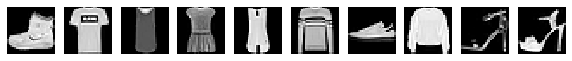

In [9]:

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    #print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [10]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:2])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [14]:
#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [15]:
# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,Flatten,Dropout,MaxPool2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax'))

#To use adam optimizer for learning weights with learning rate = 0.001
#optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
#model.compile(loss=categorical_crossentropy,
              #optimizer=optimizer,
              #metrics=['accuracy'])

#model=Sequential()
#model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#model.add(Flatten())
#model.add(Dense(128,activation='relu'))
#model.add(Dense(10,activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=512,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.5284 - accuracy: 0.8171 - val_loss: 0.3915 - val_accuracy: 0.8625
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3210 - accuracy: 0.8874 - val_loss: 0.3358 - val_accuracy: 0.8812
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2658 - accuracy: 0.9047 - val_loss: 0.2996 - val_accuracy: 0.8900
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2331 - accuracy: 0.9155 - val_loss: 0.2766 - val_accuracy: 0.8987
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2055 - accuracy: 0.9259 - val_loss: 0.2657 - val_accuracy: 0.9035
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1849 - accuracy: 0.9322 - val_loss: 0.2654 - val_accuracy: 0.9067
Epoch 7/10
60000/60000 [==============================]

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [20]:
model=Sequential()
model.add(Conv2D(32,2*2,activation='relu',input_shape=input_shape))
model.add(Conv2D(32,2*2,activation='relu',input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
output = model.fit(x_train, y_train, batch_size=512, epochs=10, verbose=2,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.6307 - accuracy: 0.7753 - val_loss: 0.4326 - val_accuracy: 0.8438
Epoch 2/10
60000/60000 - 1s - loss: 0.3790 - accuracy: 0.8668 - val_loss: 0.3483 - val_accuracy: 0.8787
Epoch 3/10
60000/60000 - 1s - loss: 0.3288 - accuracy: 0.8828 - val_loss: 0.3241 - val_accuracy: 0.8849
Epoch 4/10
60000/60000 - 1s - loss: 0.2988 - accuracy: 0.8924 - val_loss: 0.2946 - val_accuracy: 0.8938
Epoch 5/10
60000/60000 - 1s - loss: 0.2749 - accuracy: 0.9009 - val_loss: 0.2881 - val_accuracy: 0.8955
Epoch 6/10
60000/60000 - 1s - loss: 0.2532 - accuracy: 0.9083 - val_loss: 0.2789 - val_accuracy: 0.8971
Epoch 7/10
60000/60000 - 1s - loss: 0.2373 - accuracy: 0.9151 - val_loss: 0.2632 - val_accuracy: 0.9039
Epoch 8/10
60000/60000 - 1s - loss: 0.2293 - accuracy: 0.9164 - val_loss: 0.2475 - val_accuracy: 0.9093
Epoch 9/10
60000/60000 - 1s - loss: 0.2138 - accuracy: 0.9215 - val_loss: 0.2410 - val_accuracy: 0.9120
Epoch 10/10
60

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [0]:
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

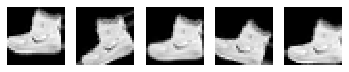

In [23]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [24]:
output = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), 
                             validation_data=(x_test, y_test), use_multiprocessing=True,
                     steps_per_epoch=len(x_train) / 32, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5412 - accuracy: 0.7967 - val_loss: 0.3698 - val_accuracy: 0.8651
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4351 - accuracy: 0.8373 - val_loss: 0.3473 - val_accuracy: 0.8753
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3996 - accuracy: 0.8518 - val_loss: 0.3298 - val_accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3736 - accuracy: 0.8603 - val_loss: 0.3202 - val_accuracy: 0.8811
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3566 - accuracy: 0.8675 - val_loss: 0.3170 - val_accuracy: 0.8829
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3469 - accuracy: 0.8699 - val_loss: 0.2

###  Report the final train and validation accuracy

In [25]:
output.history['accuracy'][-1:]

[0.88296664]

In [26]:
output.history['val_accuracy'][-1:]

[0.8936]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
x_train =  x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### **Prepare/fit the generator.**

In [0]:
cifar10datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [36]:
output = model.fit_generator(cifar10datagen.flow(x_train, y_train, batch_size=32), 
                             validation_data=(x_test, y_test), use_multiprocessing=True,
                     steps_per_epoch=len(x_train) / 32, epochs=30)

  ...
    to  
  ['...']
Train for 1562.5 steps, validate on 10000 samples
Epoch 1/30
1563/1562 [==============================] - 34s 22ms/step - loss: 1.5705 - accuracy: 0.4311 - val_loss: 1.2987 - val_accuracy: 0.5381
Epoch 2/30
1563/1562 [==============================] - 35s 22ms/step - loss: 1.3349 - accuracy: 0.5220 - val_loss: 1.1161 - val_accuracy: 0.6040
Epoch 3/30
1563/1562 [==============================] - 34s 22ms/step - loss: 1.2375 - accuracy: 0.5571 - val_loss: 1.1403 - val_accuracy: 0.6011
Epoch 4/30
1563/1562 [==============================] - 34s 22ms/step - loss: 1.1670 - accuracy: 0.5883 - val_loss: 1.0196 - val_accuracy: 0.6413
Epoch 5/30
1563/1562 [==============================] - 34s 22ms/step - loss: 1.1163 - accuracy: 0.6016 - val_loss: 1.0404 - val_accuracy: 0.6404
Epoch 6/30
1563/1562 [==============================] - 35s 22ms/step - loss: 1.0809 - accuracy: 0.6151 - val_loss: 0.9660 - val_accuracy: 0.6615
Epoch 7/30
1563/1562 [===========================

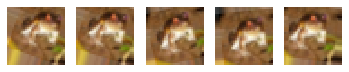

In [37]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()